Python for NLP: Multi-label Text Classification with Keras

Multi-label Text Classification Model with Single Output Layer

https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/ (english)

https://maelfabien.github.io/machinelearning/NLPfr/#7-embedding-par-mot (french - spacy)

Import data and libraries

In [4]:
import pandas as pd

#'Unnamed: 0' 'lemmes' 'pos'
X_train = pd.read_csv("../challenge_dataset/X_train_clean.csv").drop(columns='Unnamed: 0')

#'Id', 'category_1', 'category_2', 'category_3', 'category_4'
Y_train = pd.read_csv("../challenge_dataset/y_train.csv",sep=";").drop(columns="Id")

#'Id ', 'Caption'
X_test = pd.read_csv("../challenge_dataset/X_test.csv",sep=';').drop(columns='Id ')

In [5]:
X_test.columns

Index(['Caption'], dtype='object')

Necessary imports

In [6]:
#pip install tensorflow

from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import numpy as np
import re

import matplotlib.pyplot as plt

Shape and header

In [7]:
print(X_train.shape)

X_train.head()

(485, 2)


,lemmes,pos
0,"['mourir', 'heure', 'plus', 'revoir', 'petit',...","['VERB', 'NOUN', 'ADV', 'VERB', 'ADJ', 'NOUN']"
1,"['maladie', 'conséquence', 'jeune', 'génératio...","['NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN'..."
2,"['sortir', 'mal', 'loger']","['VERB', 'ADV', 'VERB']"
3,"['inquiétude', 'santé', 'proche', 'plus', 'fra...","['NOUN', 'ADJ', 'ADJ', 'ADV', 'ADJ', 'NOUN', '..."
4,"['bien', 'entendre', 'contracter', 'maladie']","['ADV', 'VERB', 'VERB', 'NOUN']"


Repartition of categories among training dataset

<AxesSubplot: >

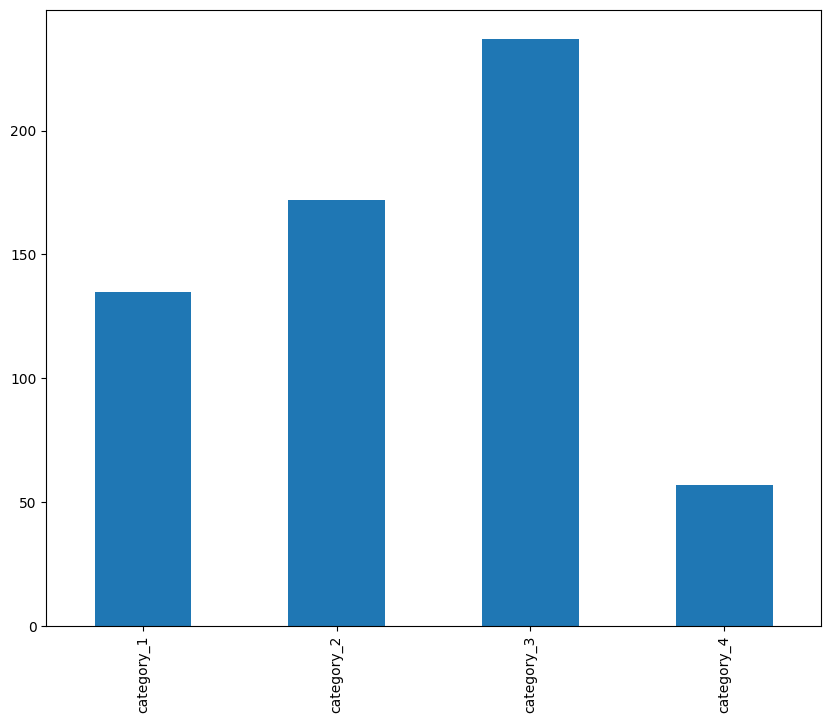

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Y_train.sum(axis=0).plot.bar()

Creating Multi-label Text Classification Models

Multi-label Text Classification Model with Single Output Layer

Pre-processing text

In [9]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Zéèàùï]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [15]:
X_train_cleaned = []

for sentences in X_train['lemmes']:
    X_train_cleaned.append(preprocess_text(sentences))

#print(X_train_cleaned)

Word embedding

In [16]:
#launch once or relaunch previous cell

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_cleaned)

X_train_cleaned = tokenizer.texts_to_sequences(X_train_cleaned)

#print(X_train_cleaned)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train_cleaned = pad_sequences(X_train_cleaned, padding='post', maxlen=maxlen)

#print(X_train_cleaned)

[[ 56 336   2 ...   0   0   0]
 [ 19  16  48 ...   0   0   0]
 [ 97  98 338 ...   0   0   0]
 ...
 [ 84 495   2 ...   0   0   0]
 [  7 230 190 ...   0   0   0]
 [ 83 201   0 ...   0   0   0]]


GloVe -- test only --

In [ ]:
from numpy import array, asarray, zeros